In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/loan_data.csv')

In [3]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

#**Creating barchart to visualize the distribution of the Categorical Variables**

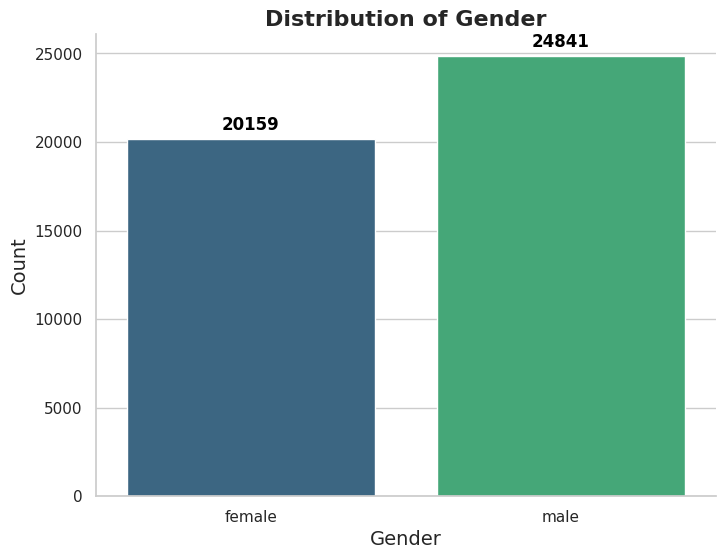

In [5]:
sns.set_theme(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 6))
bar_chart = sns.countplot(x=data['person_gender'], data=data, palette="viridis")

# Add annotations to show counts on top of bars
for p in bar_chart.patches:
    bar_chart.annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points',
                       fontsize=12, fontweight='bold', color='black')

# Set title and labels
plt.title("Distribution of Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Remove top and right borders
sns.despine(top=True, right=True)

# Show the plot
plt.show()


The data skews towards male applicants, suggesting either a higher number of men seeking loans or a potential gender-based difference in financial behavior. This imbalance could be a factor in analyzing loan approval trends and might indicate societal or economic patterns in loan applications.

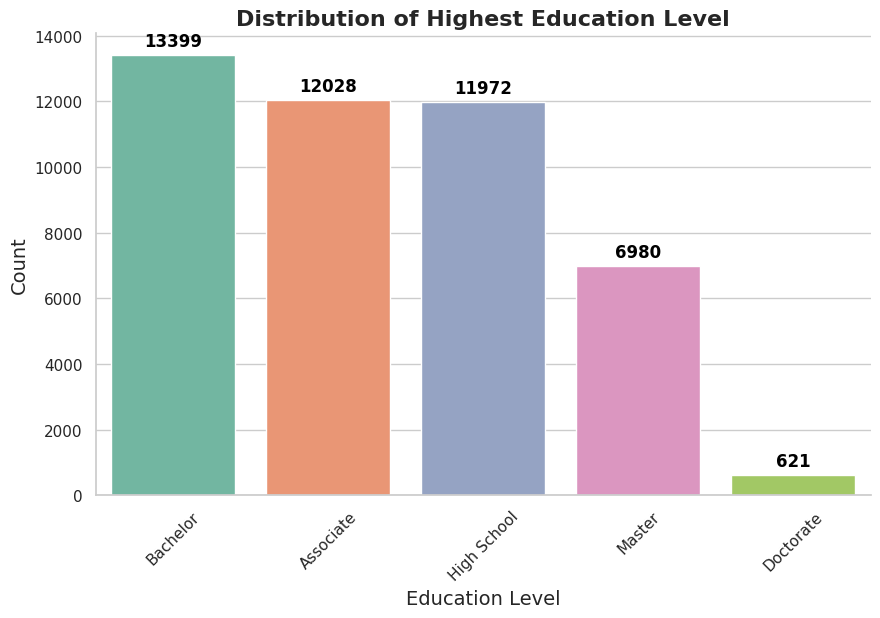

In [6]:
# Set the theme for Seaborn
sns.set_theme(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
bar_chart = sns.countplot(x=data['person_education'], data=data, palette="Set2", order=data['person_education'].value_counts().index)

# Add annotations to show counts on top of bars
for p in bar_chart.patches:
    bar_chart.annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points',
                       fontsize=12, fontweight='bold', color='black')

# Set title and labels
plt.title("Distribution of Highest Education Level", fontsize=16, fontweight='bold')
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove top and right borders for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.show()


Bachelor’s degree holders make up the largest applicant group, followed by Associate, High school and Master’s degree holders. Doctorate degrees are uncommon among applicants, which may reflect educational attainment trends and income levels that typically correlate with loan eligibility and needs.

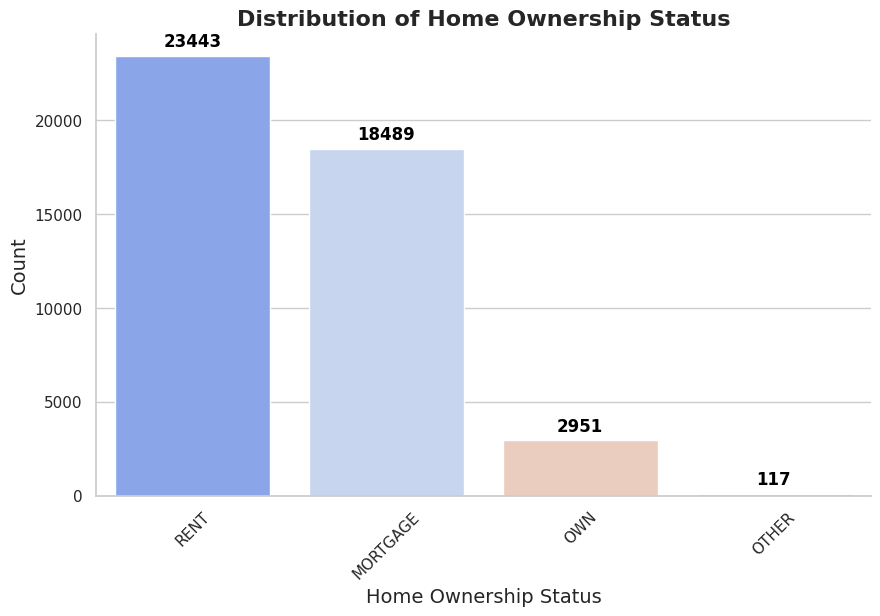

In [7]:
# Set the theme for Seaborn
sns.set_theme(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
bar_chart = sns.countplot(x=data['person_home_ownership'], data=data, palette="coolwarm", order=data['person_home_ownership'].value_counts().index)

# Add annotations to show counts on top of bars
for p in bar_chart.patches:
    bar_chart.annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points',
                       fontsize=12, fontweight='bold', color='black')

# Set title and labels
plt.title("Distribution of Home Ownership Status", fontsize=16, fontweight='bold')
plt.xlabel("Home Ownership Status", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove top and right borders for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.show()


Renting is the most common homeownership status, with Mortgages and Owning also well represented. The lower count in the “OTHER” category may indicate less conventional living arrangements, which could impact financial stability and loan approval considerations for applicants.

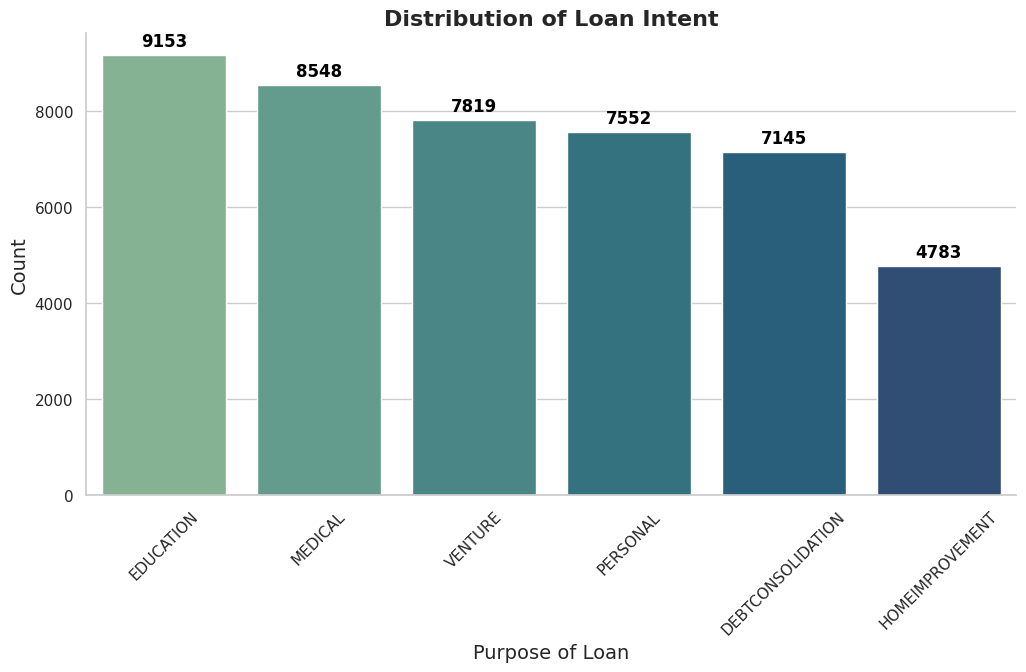

In [8]:
# Set the theme for Seaborn
sns.set_theme(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(12, 6))
bar_chart = sns.countplot(x=data['loan_intent'], data=data, palette="crest", order=data['loan_intent'].value_counts().index)

# Add annotations to show counts on top of bars
for p in bar_chart.patches:
    bar_chart.annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points',
                       fontsize=12, fontweight='bold', color='black')

# Set title and labels
plt.title("Distribution of Loan Intent", fontsize=16, fontweight='bold')
plt.xlabel("Purpose of Loan", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Remove top and right borders for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.show()


Education and Medical expenses are the primary reasons for loan applications, reflecting common financial burdens. Venture, personal, Debt-consolidation and Home improvement are less frequent, possibly suggesting specific financial needs or priorities among applicants related to managing debt and personal spending.

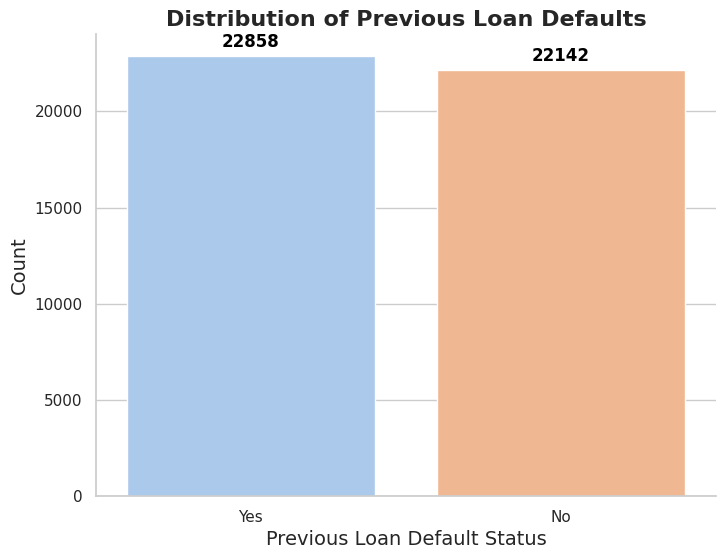

In [9]:
# Set the theme for Seaborn
sns.set_theme(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 6))
bar_chart = sns.countplot(x=data['previous_loan_defaults_on_file'], data=data, palette="pastel", order=data['previous_loan_defaults_on_file'].value_counts().index)

# Add annotations to show counts on top of bars
for p in bar_chart.patches:
    bar_chart.annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points',
                       fontsize=12, fontweight='bold', color='black')

# Set title and labels
plt.title("Distribution of Previous Loan Defaults", fontsize=16, fontweight='bold')
plt.xlabel("Previous Loan Default Status", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Remove top and right borders for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.show()


The bar chart shows that applicants are almost evenly split between those with and without previous loan defaults. Approximately 22,858 applicants have defaults, while 22,142 do not. This close distribution suggests that loan applicants in this dataset have varied credit histories, with a significant portion showing past financial difficulties. This could influence lenders’ decisions and the terms offered to these applicants.

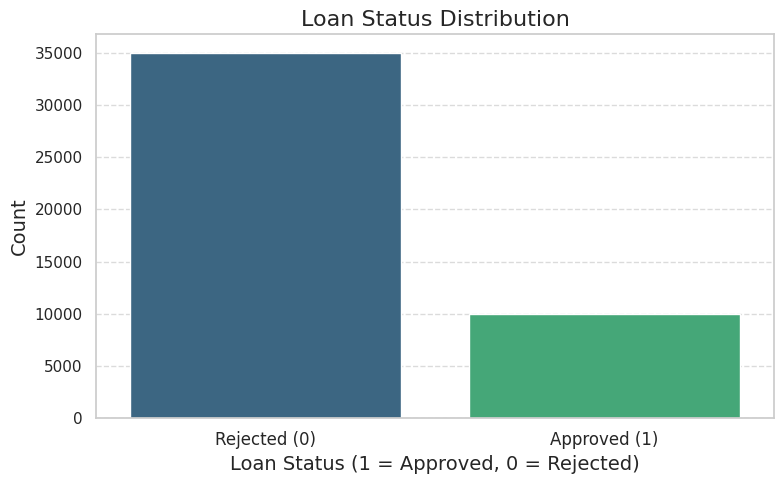

In [10]:
plt.figure(figsize=(8, 5))

# Create a bar plot
sns.countplot(x=data['loan_status'], data=data, palette="viridis", order=data['loan_status'].value_counts().index)

# Customize the plot
plt.title('Loan Status Distribution', fontsize=16)
plt.xlabel('Loan Status (1 = Approved, 0 = Rejected)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Rejected (0)', 'Approved (1)'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart
plt.tight_layout()
plt.show()


The chart reveals a high rejection rate for loan applications, with significantly more loans denied than approved. Only a small portion of applications achieve approval. This may reflect strict lending criteria, applicant credit risk factors, or economic conditions that limit eligibility, underscoring challenges applicants face in securing loans.

#**Creating Histogram to visualize the distribution of the Numerical Variables**

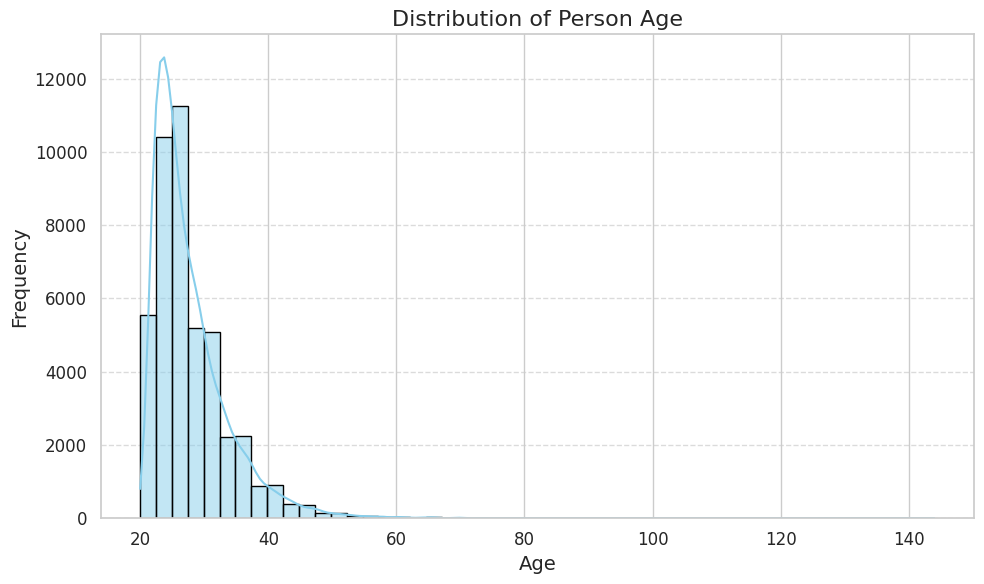

In [14]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data['person_age'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Person Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()


Applicants' average age is approximately 28, with the majority between 24 and 30 years old. The data range spans from 20 to 144, but the extreme upper limit likely represents an error or anomaly. Such outliers can distort analysis, so verifying and potentially cleaning these values is recommended.

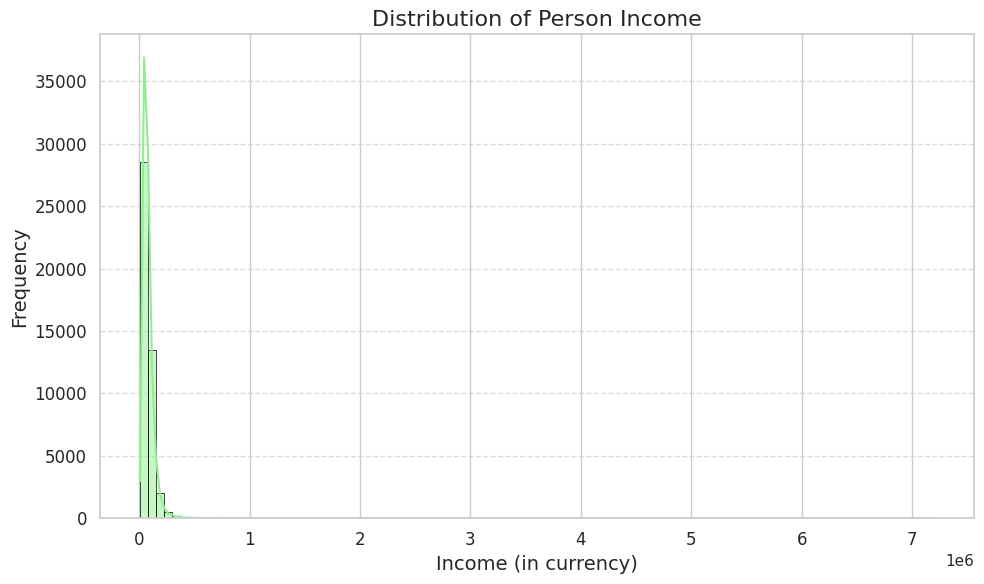

In [17]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data['person_income'], bins=100, kde=True, color='lightgreen', edgecolor='black')

# Customize the plot
plt.title('Distribution of Person Income', fontsize=16)
plt.xlabel('Income (in currency)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()


Applicant incomes show high variability, averaging around $80,319, with typical earnings between $47,204 and $95,789. However, some report exceptionally high incomes, reaching $7.2 million, likely due to extreme values or outliers.

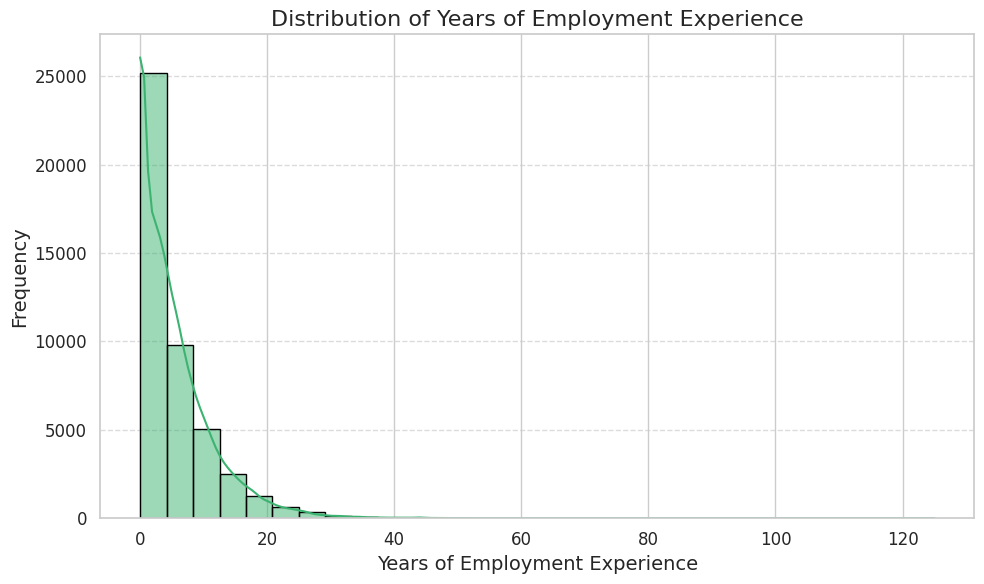

In [19]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data['person_emp_exp'], bins=30, kde=True, color='mediumseagreen', edgecolor='black')

# Customize the plot
plt.title('Distribution of Years of Employment Experience', fontsize=16)
plt.xlabel('Years of Employment Experience', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()


The average employment experience is approximately 5 years, though it varies widely from 0 to 125 years, suggesting data anomalies. Most applicants possess 1 to 8 years of experience, indicating a predominantly younger demographic among the applicants.

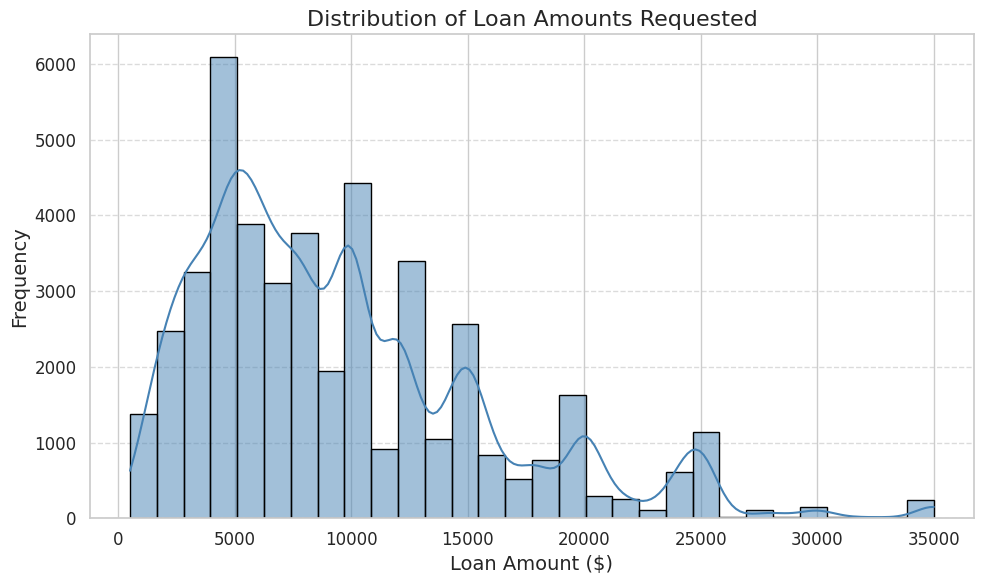

In [20]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data['loan_amnt'], bins=30, kde=True, color='steelblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Loan Amounts Requested', fontsize=16)
plt.xlabel('Loan Amount ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()



Loan amounts vary from $500 to $35,000, with an average of about $9,583. The majority of applicants seek loans between $5,000 and $12,237, indicating that their borrowing needs typically fall within a moderate range, reflecting a cautious approach to financing

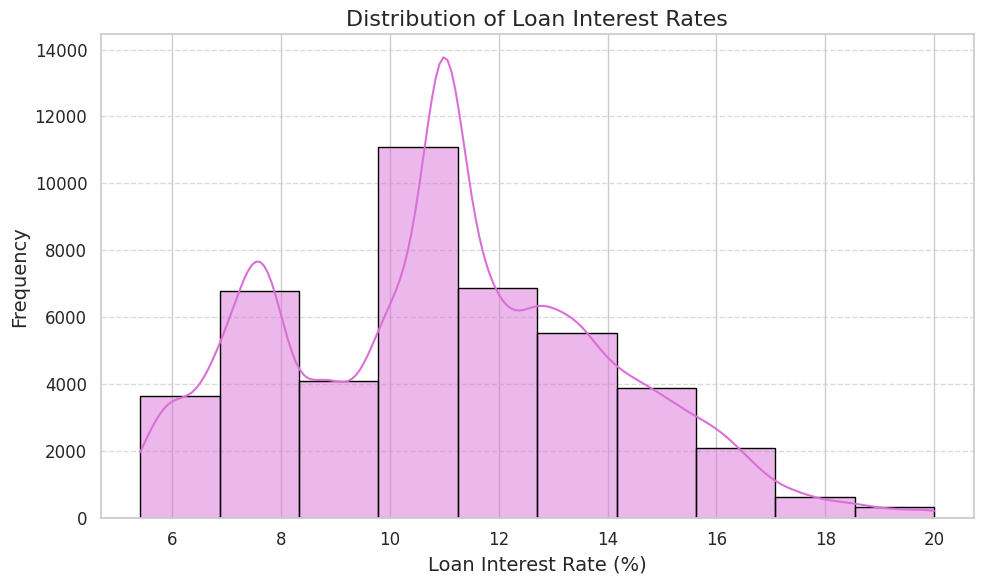

In [21]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data['loan_int_rate'], bins=10, kde=True, color='orchid', edgecolor='black')

# Customize the plot
plt.title('Distribution of Loan Interest Rates', fontsize=16)
plt.xlabel('Loan Interest Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()


Interest rates average approximately 11%, primarily falling between 8.6% and 13%. This range aligns with typical loan interest structures, while a maximum rate of 20% suggests that pricing is adjusted for higher-risk applicants, indicating lenders' strategies to manage risk in their lending practices.

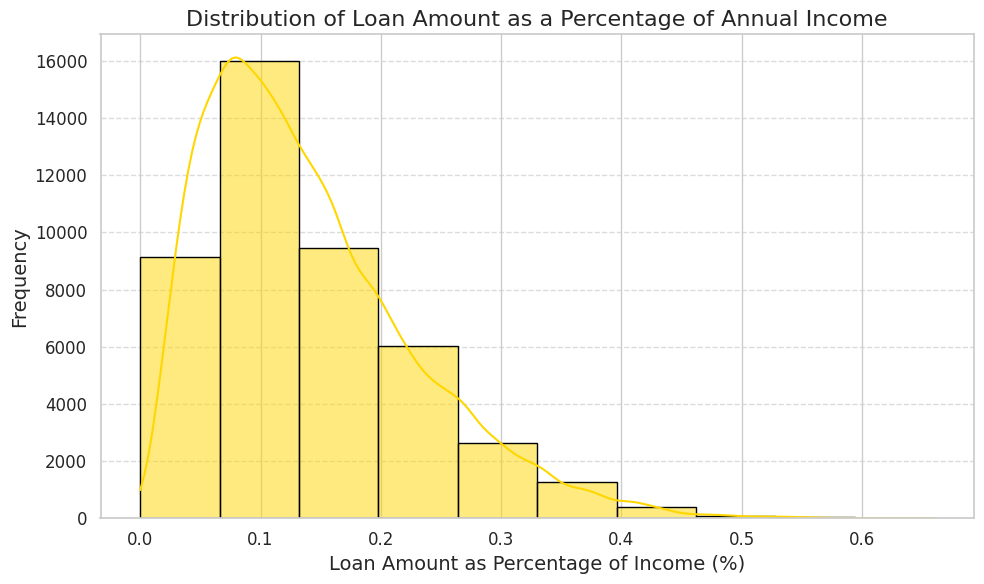

In [22]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data['loan_percent_income'], bins=10, kde=True, color='gold', edgecolor='black')

# Customize the plot
plt.title('Distribution of Loan Amount as a Percentage of Annual Income', fontsize=16)
plt.xlabel('Loan Amount as Percentage of Income (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()


Loans usually represent around 14% of an applicant’s income, but this figure can reaching up to 66%. This ratio is essential for evaluating debt-to-income levels and identifying potential repayment risks, helping lenders determine the financial health and borrowing capacity of applicants.

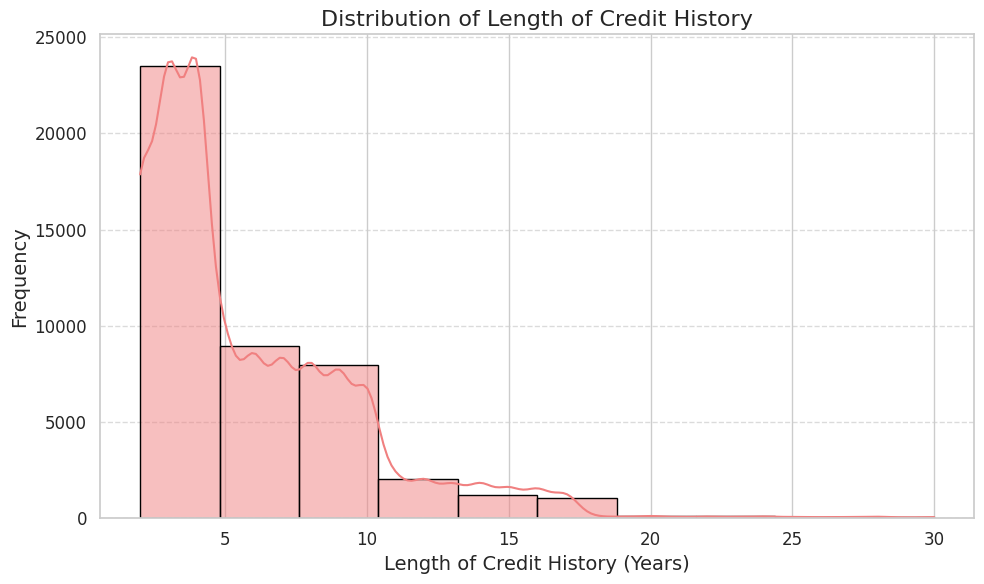

In [23]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data['cb_person_cred_hist_length'], bins=10, kde=True, color='lightcoral', edgecolor='black')

# Customize the plot
plt.title('Distribution of Length of Credit History', fontsize=16)
plt.xlabel('Length of Credit History (Years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()


The average credit history spans nearly 6 years, with most applicants holding between 3 to 8 years of credit history. Generally, a longer credit history suggests stronger creditworthiness, whereas a shorter history may elevate loan risk, influencing lenders' decisions regarding approval and terms.